a)
Three metrics—precision, recall, and F1-score—are used to assess a classification model's performance.

Precision is defined as the proportion of true positives (samples that were accurately predicted) to all anticipated positive samples.
In other words, it evaluates how well the model can predict positive samples. A model with a high precision score will have fewer false positives.

Recall is defined as the proportion of real positive samples to all real positive samples. It is a gauge of how well the model can recognize positive samples. Low false negatives are a sign of a model with a high recall score.

The harmonic mean of recall and precision is known as the F1-score. It offers a mix between recall and precision.
The F1-score is optimal at 1 (perfect precision and recall), while it is least optimal at 0.

b)
A table called a confusion matrix is used to assess how well a machine learning model is working. It is a matrix that compares actual values to predictions for a categorization issue. True positives, True Negatives, False Positives, and False Negatives are the four categories that make up the matrix.

**True Positives (TP):** The proportion of samples that are genuinely positive and that the model accurately identified as such.

**True Negatives (TN):** The proportion of samples that are genuinely negative and that the model accurately identified as such.

**False Positives (FP):** The proportion of samples that the model misclassified as positive even when they were actually negative.

**False Negatives (FN):** The proportion of samples that the model misclassified as negative but are actually positive.

The confusion matrix's diagonal values, or the true positives and true negatives, show how many cases were correctly classified. The non-diagonal values show the number of false positives and false negatives, or cases that were misclassified.

The confusion matrix's diagonal values represent the model's accuracy, while its non-diagonal values represent the kinds of mistakes it is making. The confusion matrix is a valuable tool for assessing a model's performance, especially when different sorts of errors have varying costs.

c)
As opposed to the prior split of 75% training and 25% testing, utilizing the test_size option from 0.25 to 0.4 would result in using 40% of the data for testing and 60% for training.
Increasing the test set size typically results in less data being available for training and more data being accessible for testing. This may have the following effects:


*   Due to the model's limited sample set for learning data patterns, it may be less accurate. 

*   Due to the higher sample size, the evaluation of the model's performance may be more trustworthy.

*   Because the model might have been tested on a different group of data, the classification report and confusion matrix might display different findings.


Adjusting the test_size parameter can significantly affect the outcomes of a classification model, thus it's critical to select a suitable value based on the particular issue at hand and the data at hand.

d)
Precision, recall, and F1-score metrics have been used to compare the Random Forest and SVC classifiers. The same dataset was used for both the training and testing of both classifiers.

The SVC classifier performs better than the Random Forest classifier when measured against the evaluation measures. 

Comparing the SVC classifier to the Random Forest classifier, the SVC classifier has greater values for practically all classes. 

The results are as below:

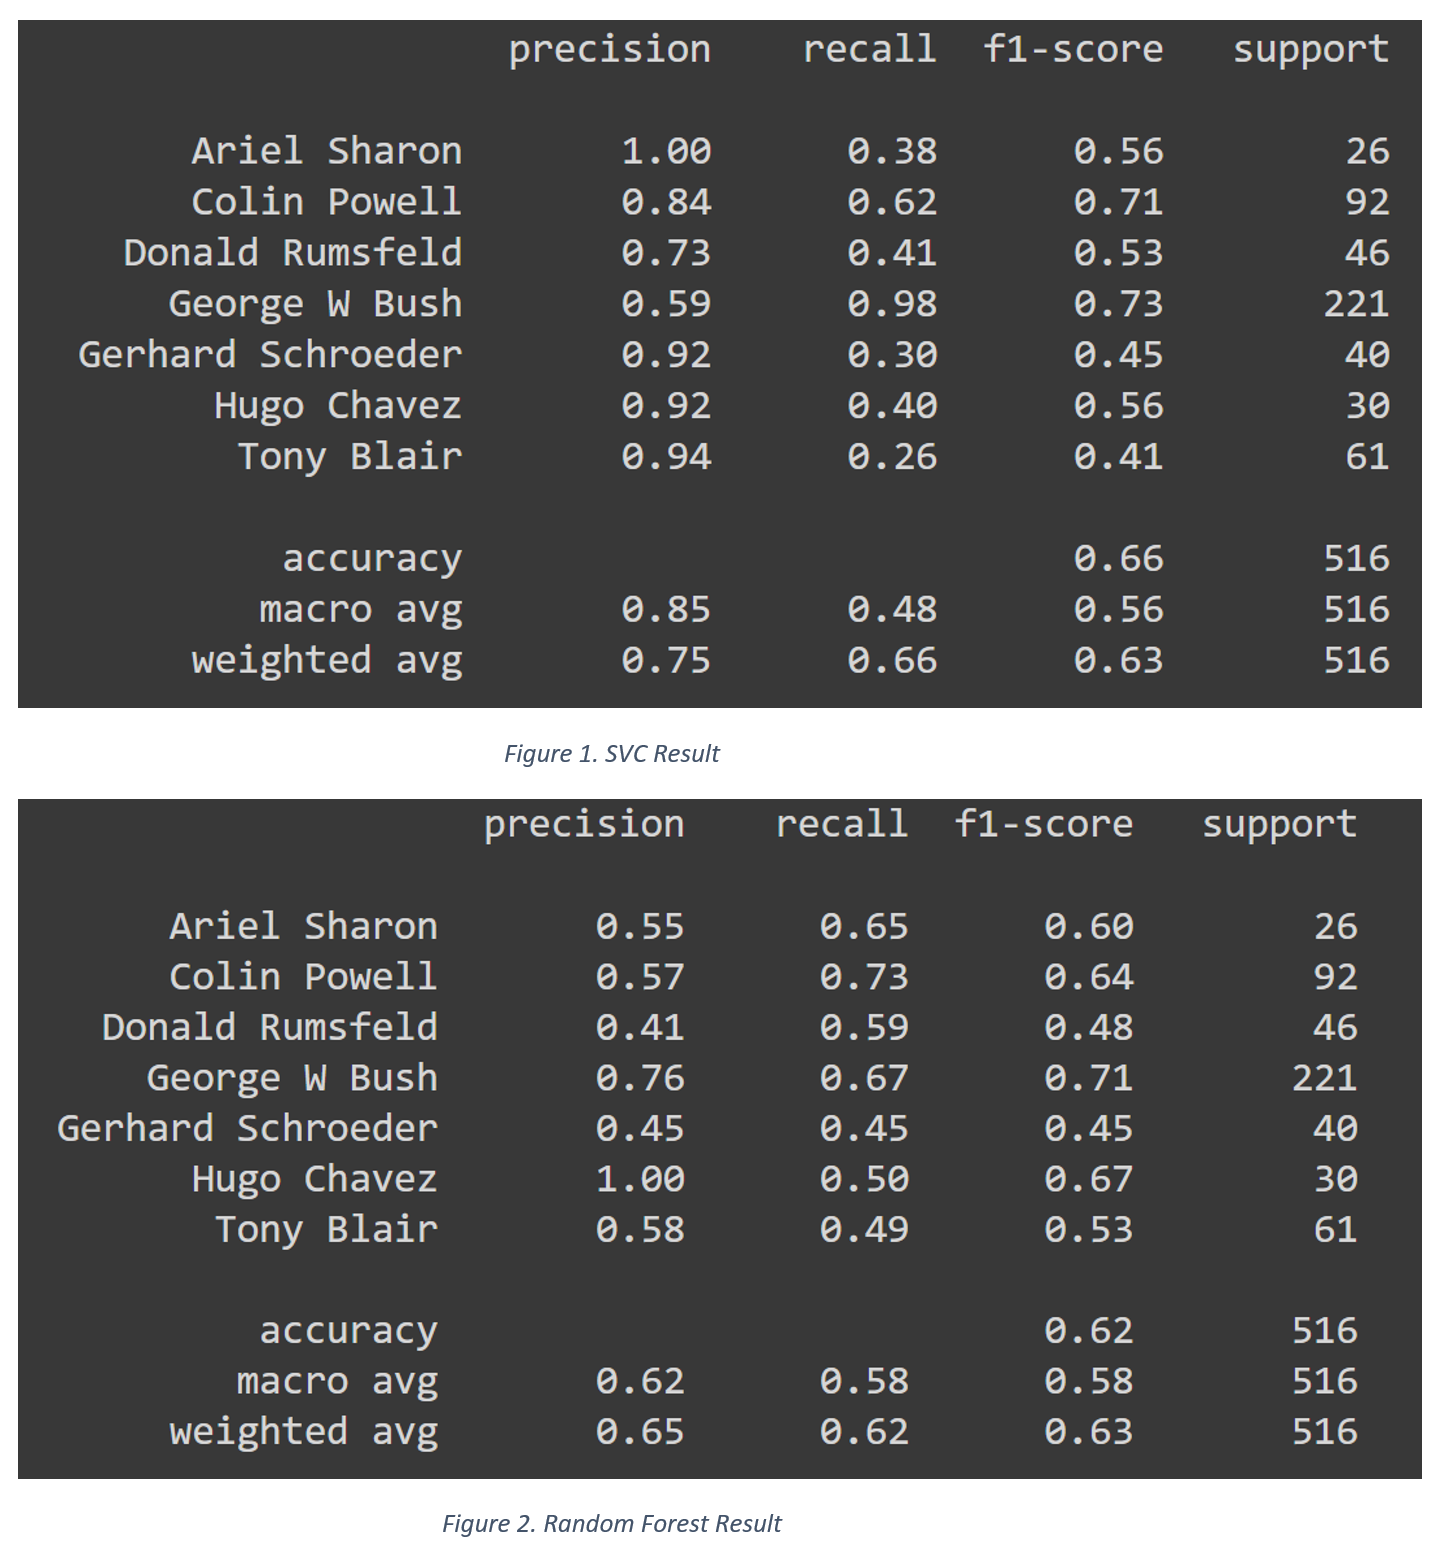

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 772 faces
done in 0.429s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.045s
Fitting the classifier to the training set
done in 448.029s
Best estimator found by grid search:
RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='log2')
Predicting people's names on the test set
done in 0.019s
                   precision    recall  f1-score   support

     Ariel Sharon       0.55      0.65      0.60        26
     Colin Powell       0.57      0.73      0.64        92
  Donald Rumsfeld       0.41      0.59      0.48        46
    George W Bush       0.76      0.67      0.71       221
Gerhard Schroeder       0.45      0.45      0.45        40
      Hugo Chavez       1.00      0.50      0.67        30
       Tony Blair       0.58      0.49      0.53        61

         accuracy                           0.62       516
 

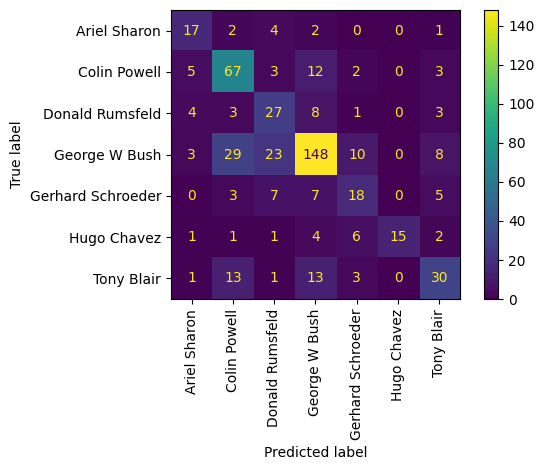

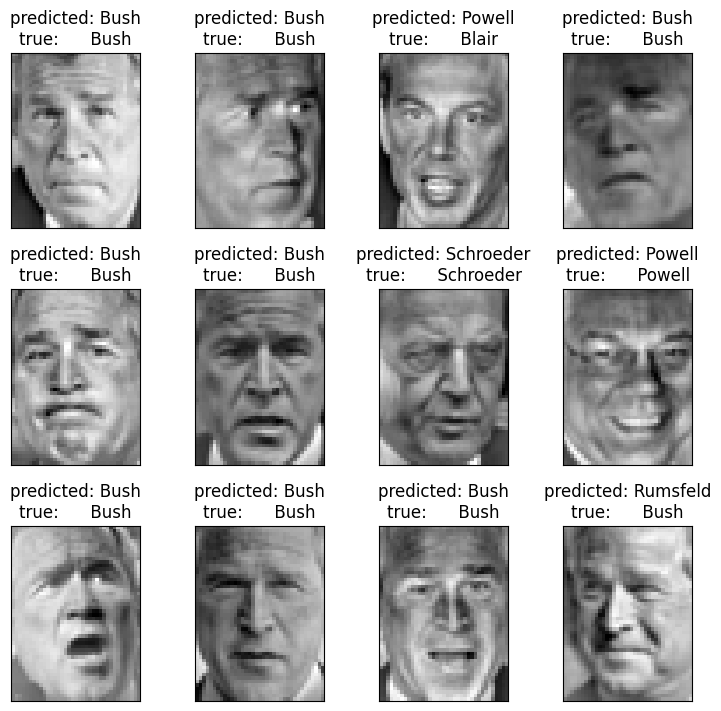

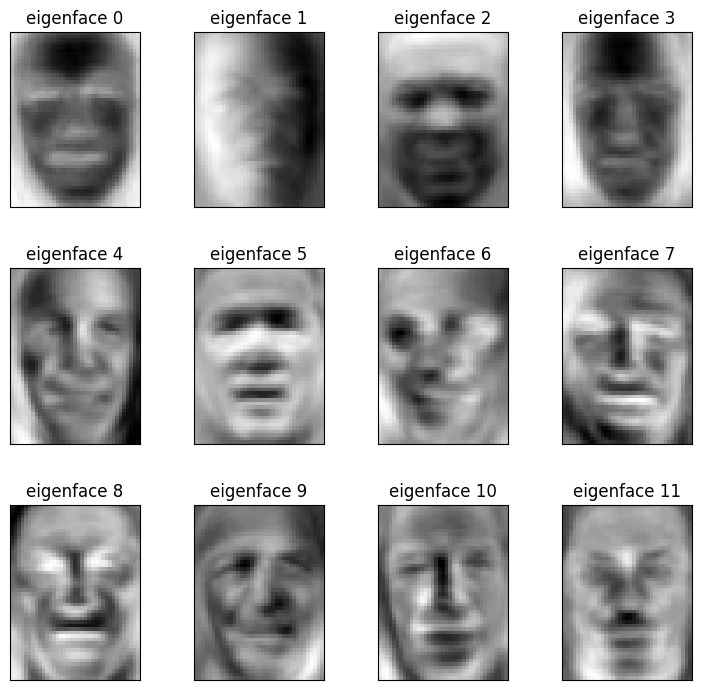

In [3]:
"""
===================================================
Faces recognition example using eigenfaces and SVMs
===================================================

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

.. _LFW: http://vis-www.cs.umass.edu/lfw/

"""
# %%
from time import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.fixes import loguniform

# %%
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)



# Q2-PART C: Change the test_size from 0.25 to 0.4

# %%
# Split into a training set and a test and keep 25% of the data for testing.
"""
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
"""
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# %%
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction

n_components = 150

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# %%
# Train a SVM classification model
"""
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)
"""


# Train a Random Forest classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [5, 10, 20, None],
    "max_features": ["sqrt", "log2", None],
}
clf = RandomizedSearchCV(
    RandomForestClassifier(class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() -t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()


# Qualitative evaluation of the predictions using matplotlib


def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# %%
# plot the result of the prediction on a portion of the test set


def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)
# %%
# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()


